# PHASE I




In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils.vis_utils import plot_model



Bringing in the data file to assign as the dataset

---



In [6]:
file_name = 'adult1.csv'
dataset = pd.read_csv(file_name, delimiter=',')

Making sure our data has the right height and width

In [7]:
# print off rows and columns to make sure the dimensions are correct
print("Rows: %s" % dataset.shape[0])
print("Columns: %s" % dataset.shape[1])

# head shows the first n amount of rows, in this case n=10
dataset.head(10)

Rows: 32561
Columns: 14


,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0
5,37,1,284582,14,14,1,2,1,0,0,0,40,1,0
6,49,1,160187,4,5,3,0,2,0,0,0,16,2,0
7,52,2,209642,10,9,1,1,1,1,0,0,45,1,1
8,31,1,45781,14,14,0,0,1,0,14084,0,50,1,1
9,42,1,159449,13,13,1,1,1,1,5178,0,40,1,1


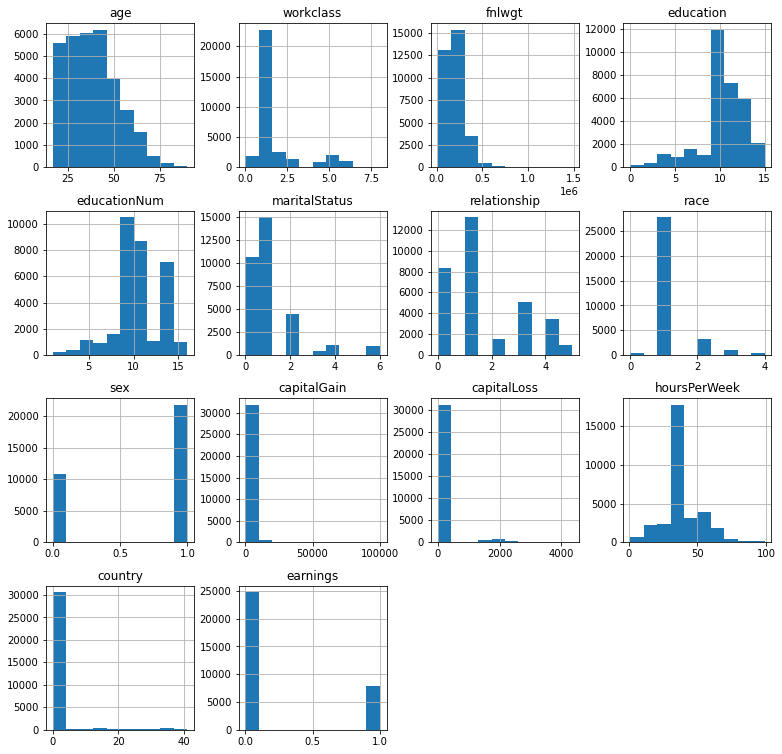

In [8]:
plt.rcParams["figure.figsize"] = ((13,13))
dataset.hist()
plt.show()

In [9]:
dataset.describe()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.622401,1.897784e+05,10.214766,10.080679,1.083781,1.542397,1.180093,0.669205,1077.648844,87.303830,40.437456,2.305580,0.240810
std,13.640433,1.443345,1.055500e+05,2.692418,2.572720,1.251381,1.437431,0.534266,0.470506,7385.292085,402.960219,12.347429,5.594557,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178270e+05,10.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.783560e+05,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,11.000000,12.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


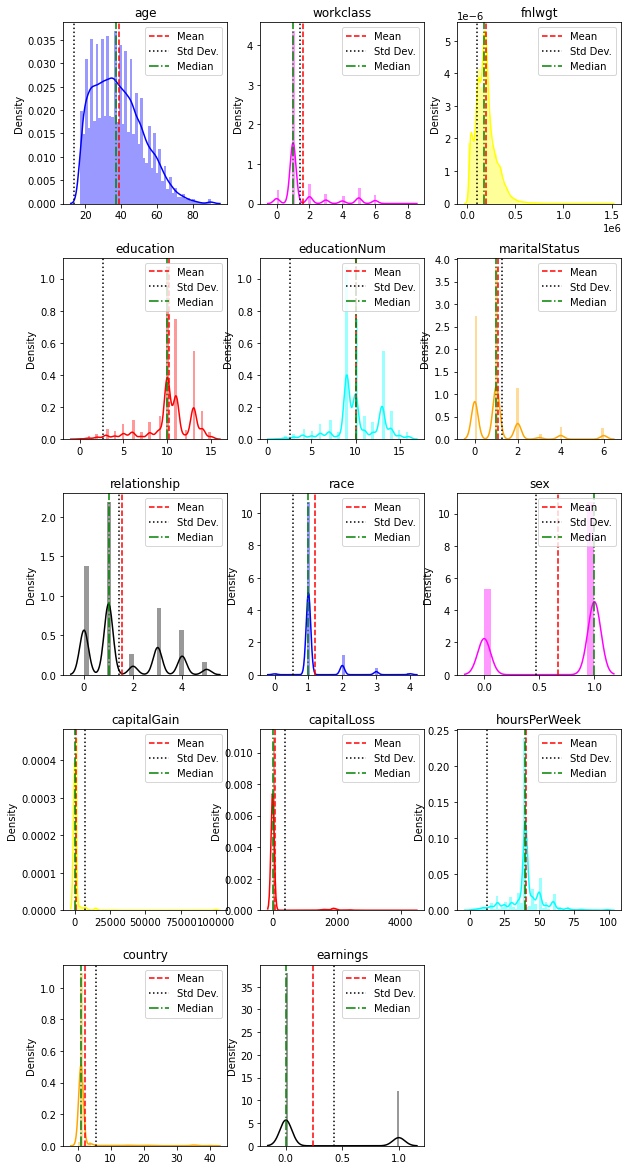

In [10]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country', 'earnings']
c_length  = len(columns)
c_colors  = ["blue", "magenta", "yellow", "red", "cyan", "orange", "black", "blue", "magenta", "yellow", "red", "cyan", "orange", "black"]

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 25))
for i, j, k in itertools.zip_longest(columns, range(c_length), c_colors):
    plt.subplot(6, 3, j+1)
    sns.distplot(dataset[i], color = k)
    plt.title(i) # Title of column represented
    plt.xlabel("") # clears the x axis label
    plt.subplots_adjust(hspace = 0.3)
    plt.axvline(dataset[i].mean(), color = "red", linestyle="dashed", label="Mean")
    plt.axvline(dataset[i].std(), color = "black", linestyle="dotted", label="Std Dev.")
    plt.axvline(dataset[i].median(), color = "green", linestyle="dashdot", label="Median")
    plt.legend(loc="upper right")

Text(0, 0.5, 'Amount')

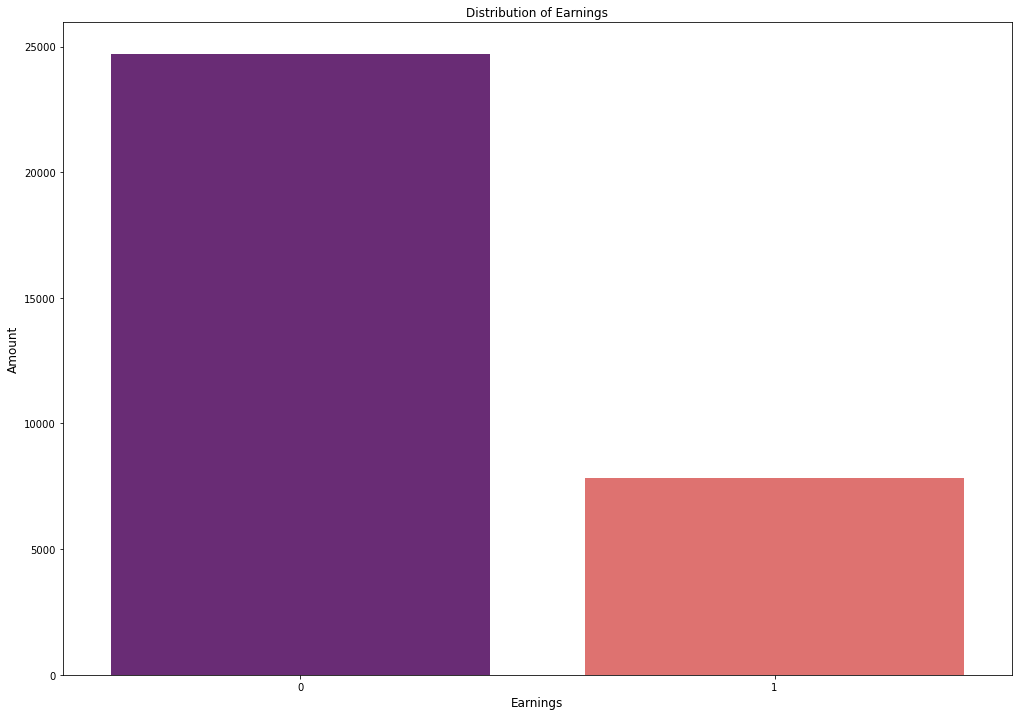

In [11]:
# Distribution of Math Scores
plt.figure(figsize=(17, 12))
axs = sns.countplot(dataset['earnings'], palette='magma')
plt.title('Distribution of Earnings', fontsize=12)
plt.xlabel('Earnings', fontsize=12)
plt.ylabel('Amount', fontsize=12)

Next I will create a correlation map

Honestly I may change my dataset after looking at this, I would like to see more variation

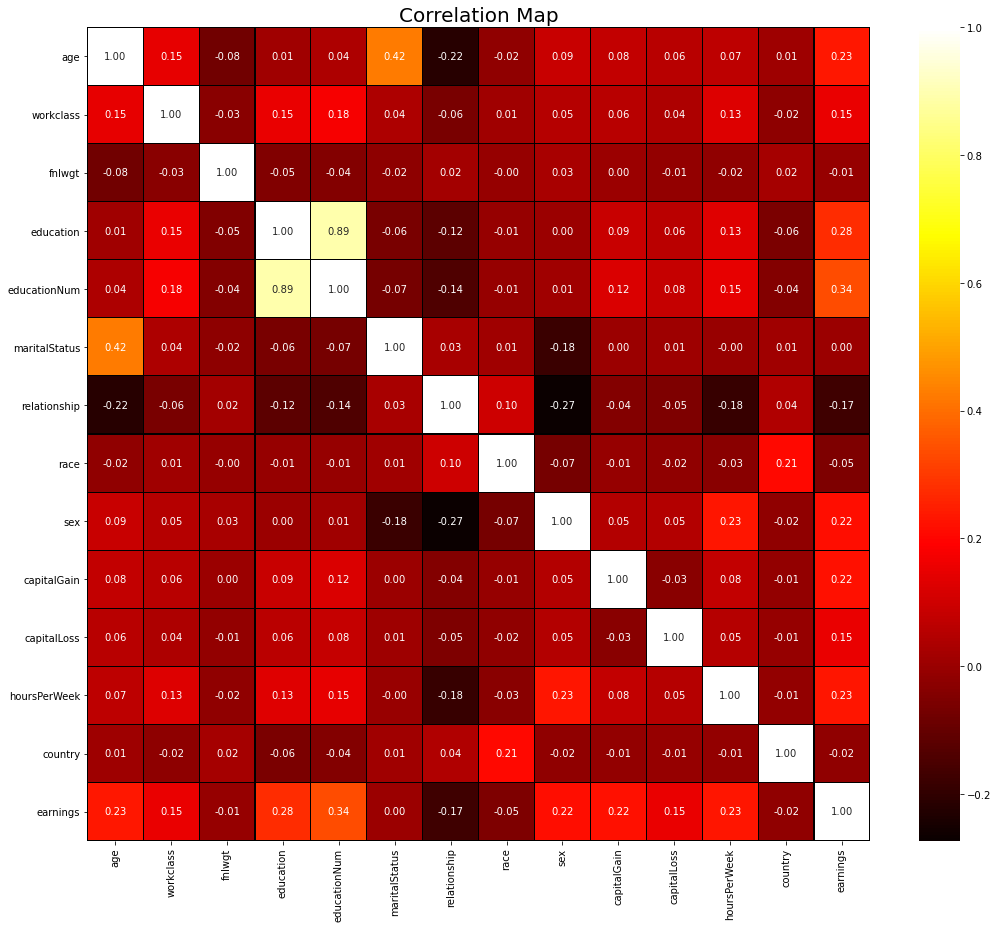

In [12]:
# Correlation
plt.figure(figsize=(15, 13))
sns.heatmap(data=dataset.corr(), annot=True, cmap="hot", linewidths=0.1, fmt=".2f", linecolor="black")
plt.title("Correlation Map", fontsize=20)
plt.tight_layout()
plt.show()

# Honestly I may change my dataset after looking at this, I would like to see more variation

In [13]:
from sklearn import preprocessing
# Normalizing data between (0-1)
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Insert column names back into data
normalized_df = pd.DataFrame(x_scaled, columns=dataset.columns)


# Output the first 10 rows to check data is normalized
normalized_df.head(10)


,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,0.301370,0.375,0.044302,0.866667,0.800000,0.000000,0.0,0.25,1.0,0.021740,0.0,0.397959,0.024390,0.0
1,0.452055,0.250,0.048238,0.866667,0.800000,0.166667,0.2,0.25,1.0,0.000000,0.0,0.122449,0.024390,0.0
2,0.287671,0.125,0.138113,0.666667,0.533333,0.333333,0.0,0.25,1.0,0.000000,0.0,0.397959,0.024390,0.0
3,0.493151,0.125,0.151068,0.400000,0.400000,0.166667,0.2,0.50,1.0,0.000000,0.0,0.397959,0.024390,0.0
4,0.150685,0.125,0.221488,0.866667,0.800000,0.166667,0.4,0.50,0.0,0.000000,0.0,0.397959,0.341463,0.0
5,0.273973,0.125,0.184932,0.933333,0.866667,0.166667,0.4,0.25,0.0,0.000000,0.0,0.397959,0.024390,0.0
6,0.438356,0.125,0.100448,0.266667,0.266667,0.500000,0.0,0.50,0.0,0.000000,0.0,0.153061,0.048780,0.0
7,0.479452,0.250,0.134036,0.666667,0.533333,0.166667,0.2,0.25,1.0,0.000000,0.0,0.448980,0.024390,1.0
8,0.191781,0.125,0.022749,0.933333,0.866667,0.000000,0.0,0.25,0.0,0.140841,0.0,0.500000,0.024390,1.0
9,0.342466,0.125,0.099947,0.866667,0.800000,0.166667,0.2,0.25,1.0,0.051781,0.0,0.397959,0.024390,1.0


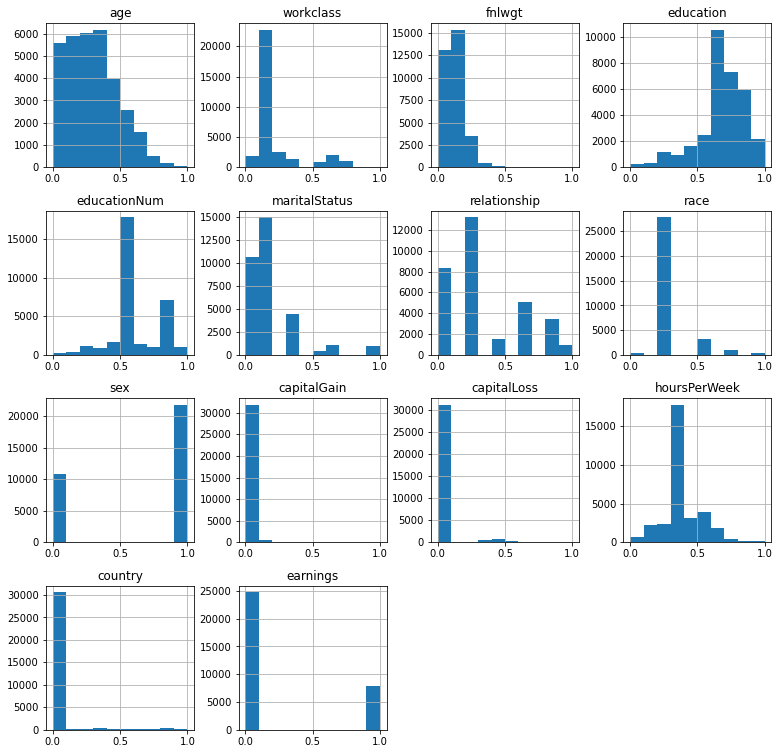

In [14]:
normalized_df.hist()
plt.show()

#Illistrating the Nueral Networks


In [15]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    #source: https://gist.github.com/craffel/2d727968c3aaebd10359
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

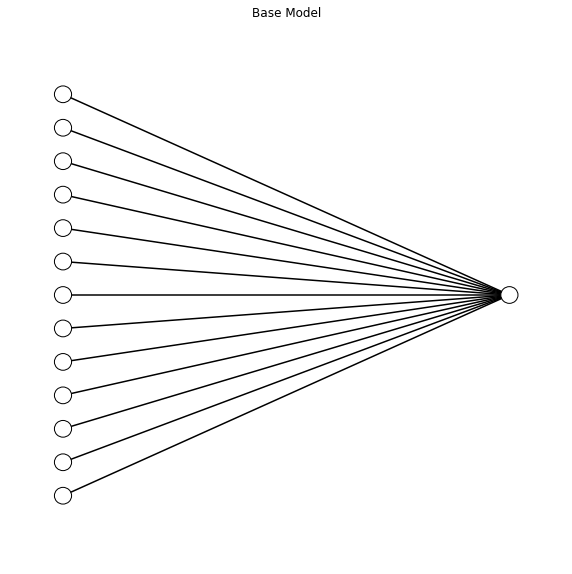

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Base Model")
draw_neural_net(ax, .1, .9, .1, .9, [13, 1])

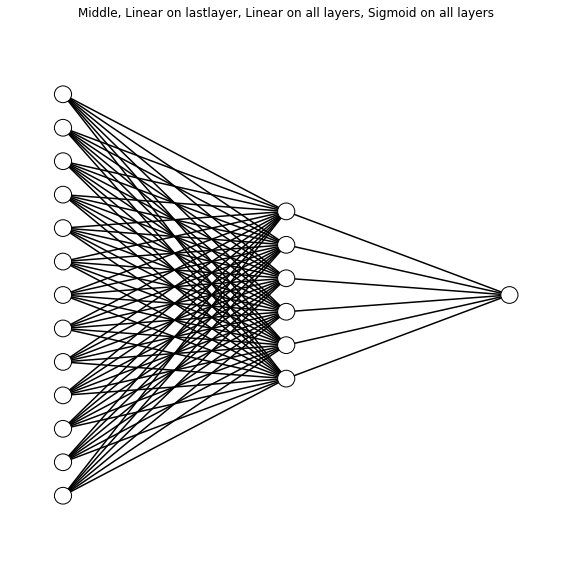

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Middle, Linear on lastlayer, Linear on all layers, Sigmoid on all layers")
draw_neural_net(ax, .1, .9, .1, .9, [13,6, 1])

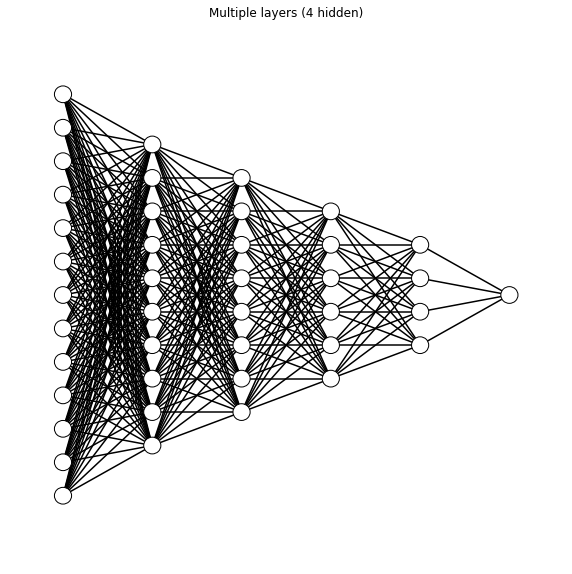

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Multiple layers (4 hidden)")
draw_neural_net(ax, .1, .9, .1, .9, [13,10,8,6,4, 1])

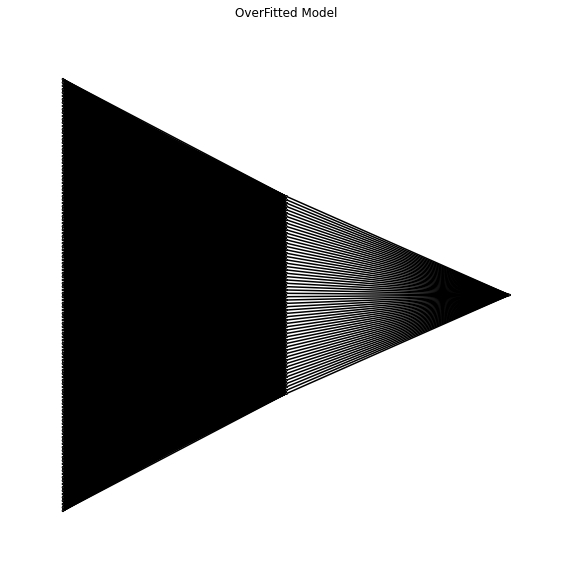

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("OverFitted Model")
draw_neural_net(ax, .1, .9, .1, .9, [130,60, 1])

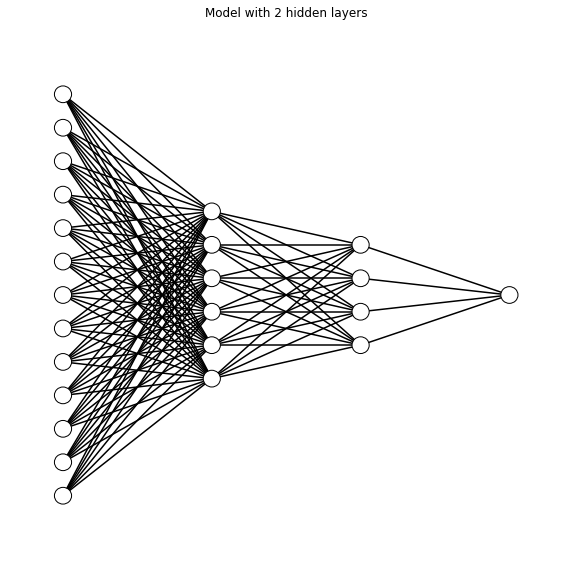

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Model with 2 hidden layers")
draw_neural_net(ax, .1, .9, .1, .9, [13,6,4,1])

# PHASE II

Splitting my data into training and validation sets

In [21]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values
X = dataset.drop('earnings', axis='columns').values
Y = dataset['earnings'].values

In [22]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))  
print(index_30percent)

# Split into validation (30%) and training (70%)
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]
XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

9768


In [23]:
# Mean normalization
Xmin = XTRAIN.min(axis = 0) 
Xmax = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (Xmax - Xmin)
XVALID = (XVALID - mean) / (Xmax - Xmin)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'educationNum'}>,
        <AxesSubplot:title={'center':'maritalStatus'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capitalGain'}>,
        <AxesSubplot:title={'center':'capitalLoss'}>,
        <AxesSubplot:title={'center':'hoursPerWeek'}>],
       [<AxesSubplot:title={'center':'country'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

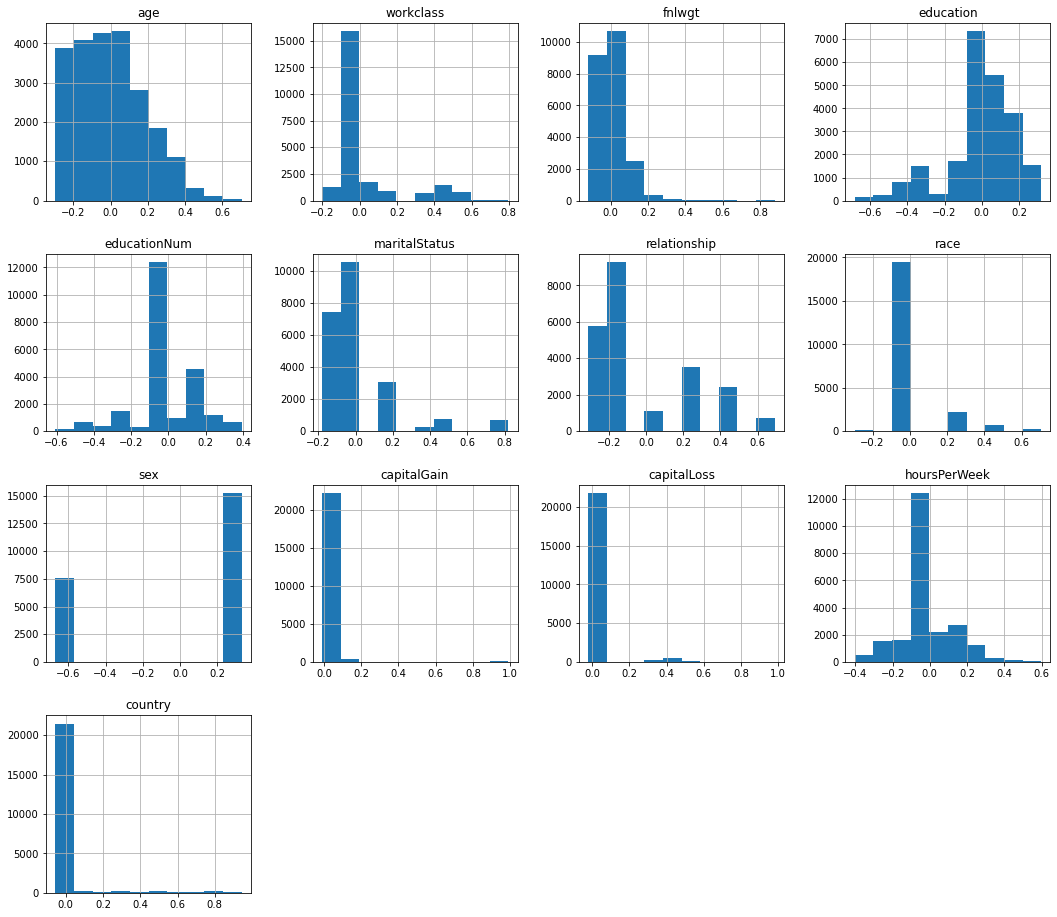

In [24]:
train_norm = pd.DataFrame(data=XTRAIN)
train_norm.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country']
train_norm.hist(figsize=(18,16))

Next we will set up the models

In [25]:
!pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(XTRAIN, YTRAIN.ravel())

In [28]:
print("Before OverSampling, counts of label '2': {}".format(sum(YTRAIN==2)))
print("Before OverSampling, counts of label '1': {}".format(sum(YTRAIN==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(YTRAIN==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(XTRAIN, YTRAIN.ravel())

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

print('Before OverSampling, the shape of train_X: {}'.format(XTRAIN.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(YTRAIN.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before OverSampling, counts of label '2': 0
Before OverSampling, counts of label '1': 5515
Before OverSampling, counts of label '0': 17278 

After OverSampling, counts of label '0': 0
After OverSampling, counts of label '1': 17278
After OverSampling, counts of label '0': 17278 

Before OverSampling, the shape of train_X: (22793, 13)
Before OverSampling, the shape of train_y: (22793,) 

After OverSampling, the shape of train_X: (34556, 13)
After OverSampling, the shape of train_y: (34556,) 



In [29]:
# Setting up the models

# Base model 1 input, 1 output
model_base = Sequential([ 
                    Dense(units=12, input_dim = len(X_train_res[0, :]), activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding a middle layer
model_middle = Sequential([
                    Dense(units=12, input_dim = len(X_train_res[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding another hidden layer
model_4_layers = Sequential([
                    Dense(units=12, input_dim = len(X_train_res[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding multiple hidden layers
model_mult_layers = Sequential([
                    Dense(units=12, input_dim = len(X_train_res[0, :]), activation='relu'),
                    Dense(units=10, activation='relu'),
                    Dense(units=8, activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# linear activation on last layer
model_linear_last = Sequential([
                    Dense(units=12, input_dim = len(X_train_res[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='linear')
])

# linear activation on all layers
model_linear_all = Sequential([
                    Dense(units=12, input_dim = len(X_train_res[0, :]), activation='linear'),
                    Dense(units=6, activation='linear'),
                    Dense(units=1, activation='linear')
])

# sigmoid activation on all layers
model_sigmoid_all = Sequential([
                    Dense(units=12, input_dim = len(X_train_res[0, :]), activation='sigmoid'),
                    Dense(units=6, activation='sigmoid'),
                    Dense(units=1, activation='sigmoid')
])

# Overfitted model
model_overfitted = Sequential([
                    Dense(units=120, input_dim = len(X_train_res[0, :]), activation='linear'),
                    Dense(units=60, activation='linear'),
                    Dense(units=1, activation='linear')
])




In [30]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Now we must compile each model to prepare it for the .fit() function

In [32]:
model_base.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_middle.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_4_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_mult_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_last.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_sigmoid_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_overfitted.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [34]:
# Learn the model from training set
history1 = model_base.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8278 - val_loss: 0.3928 - val_accuracy: 0.8060
Epoch 2/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3773 - accuracy: 0.8274 - val_loss: 0.3900 - val_accuracy: 0.8068
Epoch 3/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3771 - accuracy: 0.8269 - val_loss: 0.3944 - val_accuracy: 0.8059
Epoch 4/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3772 - accuracy: 0.8279 - val_loss: 0.3930 - val_accuracy: 0.8051
Epoch 5/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8273 - val_loss: 0.3870 - val_accuracy: 0.8070
Epoch 6/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3773 - accuracy: 0.8276 - val_loss: 0.3856 - val_accuracy: 0.8075
Epoch 7/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3770 - accuracy: 0.8268 - val_loss: 0.3888 - val_accuracy: 0.8071

Epoch 58/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 0.8284 - val_loss: 0.3856 - val_accuracy: 0.8063
Epoch 59/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 0.8290 - val_loss: 0.3873 - val_accuracy: 0.8052
Epoch 60/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3748 - accuracy: 0.8286 - val_loss: 0.3955 - val_accuracy: 0.8017
Epoch 61/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 0.8295 - val_loss: 0.3827 - val_accuracy: 0.8056
Epoch 62/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3749 - accuracy: 0.8284 - val_loss: 0.3833 - val_accuracy: 0.8068
Epoch 63/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3748 - accuracy: 0.8284 - val_loss: 0.3863 - val_accuracy: 0.8054
Epoch 64/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3746 - accuracy: 0.8285 - val_loss: 0.3775 - val_accuracy:

In [35]:
history2 = model_middle.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7423 - val_loss: 0.4876 - val_accuracy: 0.7656
Epoch 2/100
540/540 [==============================] - 1s 1ms/step - loss: 0.4361 - accuracy: 0.7986 - val_loss: 0.4052 - val_accuracy: 0.8028
Epoch 3/100
540/540 [==============================] - 1s 1ms/step - loss: 0.4056 - accuracy: 0.8136 - val_loss: 0.4022 - val_accuracy: 0.8006
Epoch 4/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3959 - accuracy: 0.8169 - val_loss: 0.3983 - val_accuracy: 0.8013
Epoch 5/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3907 - accuracy: 0.8198 - val_loss: 0.3840 - val_accuracy: 0.8067
Epoch 6/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3873 - accuracy: 0.8208 - val_loss: 0.3750 - val_accuracy: 0.8119
Epoch 7/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3848 - accuracy: 0.8218 - val_loss: 0.3953 - val_accuracy: 0.8017

Epoch 58/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3688 - accuracy: 0.8312 - val_loss: 0.3936 - val_accuracy: 0.8031
Epoch 59/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3688 - accuracy: 0.8308 - val_loss: 0.3906 - val_accuracy: 0.8034
Epoch 60/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3687 - accuracy: 0.8328 - val_loss: 0.3843 - val_accuracy: 0.8052
Epoch 61/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3682 - accuracy: 0.8325 - val_loss: 0.3919 - val_accuracy: 0.8022
Epoch 62/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 0.8308 - val_loss: 0.3857 - val_accuracy: 0.8056
Epoch 63/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 0.8320 - val_loss: 0.3988 - val_accuracy: 0.8016
Epoch 64/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 0.8318 - val_loss: 0.3992 - val_accuracy:

In [36]:
history3 = model_4_layers.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7423 - val_loss: 0.4447 - val_accuracy: 0.7831
Epoch 2/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8006 - val_loss: 0.4289 - val_accuracy: 0.7911
Epoch 3/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8153 - val_loss: 0.4017 - val_accuracy: 0.8002
Epoch 4/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3926 - accuracy: 0.8181 - val_loss: 0.4102 - val_accuracy: 0.7968
Epoch 5/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3891 - accuracy: 0.8200 - val_loss: 0.3984 - val_accuracy: 0.8014
Epoch 6/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3866 - accuracy: 0.8214 - val_loss: 0.3729 - val_accuracy: 0.8123
Epoch 7/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3852 - accuracy: 0.8221 - val_loss: 0.3807 - val_accuracy: 0.8104

Epoch 58/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8318 - val_loss: 0.3852 - val_accuracy: 0.8058
Epoch 59/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3674 - accuracy: 0.8304 - val_loss: 0.3931 - val_accuracy: 0.8022
Epoch 60/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3671 - accuracy: 0.8317 - val_loss: 0.4043 - val_accuracy: 0.7948
Epoch 61/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8313 - val_loss: 0.4080 - val_accuracy: 0.7931
Epoch 62/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3667 - accuracy: 0.8319 - val_loss: 0.4121 - val_accuracy: 0.7912
Epoch 63/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3666 - accuracy: 0.8324 - val_loss: 0.4037 - val_accuracy: 0.7959
Epoch 64/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8308 - val_loss: 0.3816 - val_accuracy:

In [37]:
history4 = model_mult_layers.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 2s 2ms/step - loss: 0.5954 - accuracy: 0.7196 - val_loss: 0.5948 - val_accuracy: 0.7952
Epoch 2/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4850 - accuracy: 0.8166 - val_loss: 0.5455 - val_accuracy: 0.7854
Epoch 3/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4469 - accuracy: 0.8200 - val_loss: 0.4845 - val_accuracy: 0.7986
Epoch 4/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4247 - accuracy: 0.8230 - val_loss: 0.4816 - val_accuracy: 0.7894
Epoch 5/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8239 - val_loss: 0.4264 - val_accuracy: 0.8104
Epoch 6/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8260 - val_loss: 0.4174 - val_accuracy: 0.8099
Epoch 7/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8273 - val_loss: 0.4404 - val_accuracy: 0.7961

Epoch 58/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3641 - accuracy: 0.8334 - val_loss: 0.4116 - val_accuracy: 0.7937
Epoch 59/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8337 - val_loss: 0.3746 - val_accuracy: 0.8101
Epoch 60/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8337 - val_loss: 0.4071 - val_accuracy: 0.7961
Epoch 61/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8330 - val_loss: 0.4107 - val_accuracy: 0.7923
Epoch 62/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8330 - val_loss: 0.3861 - val_accuracy: 0.8040
Epoch 63/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.7956
Epoch 64/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8336 - val_loss: 0.3872 - val_accuracy:

In [38]:
history5 = model_linear_last.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 1s 2ms/step - loss: 0.8792 - accuracy: 0.5900 - val_loss: 0.5558 - val_accuracy: 0.7149
Epoch 2/100
540/540 [==============================] - 1s 1ms/step - loss: 0.5183 - accuracy: 0.7602 - val_loss: 0.4780 - val_accuracy: 0.7797
Epoch 3/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4781 - accuracy: 0.7808 - val_loss: 0.3903 - val_accuracy: 0.8256
Epoch 4/100
540/540 [==============================] - 1s 1ms/step - loss: 0.4620 - accuracy: 0.7877 - val_loss: 0.4449 - val_accuracy: 0.7877
Epoch 5/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8034 - val_loss: 0.4000 - val_accuracy: 0.8081
Epoch 6/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8084 - val_loss: 0.4290 - val_accuracy: 0.7989
Epoch 7/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.7555 - val_loss: 0.4220 - val_accuracy: 0.7992

Epoch 58/100
540/540 [==============================] - 1s 1ms/step - loss: 0.4047 - accuracy: 0.8179 - val_loss: 0.4312 - val_accuracy: 0.7913
Epoch 59/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3971 - accuracy: 0.8218 - val_loss: 0.4189 - val_accuracy: 0.7990
Epoch 60/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3928 - accuracy: 0.8239 - val_loss: 0.4218 - val_accuracy: 0.8007
Epoch 61/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3922 - accuracy: 0.8239 - val_loss: 0.4252 - val_accuracy: 0.7998
Epoch 62/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4443 - accuracy: 0.8032 - val_loss: 0.3792 - val_accuracy: 0.8195
Epoch 63/100
540/540 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8208 - val_loss: 0.3886 - val_accuracy: 0.8076
Epoch 64/100
540/540 [==============================] - 1s 1ms/step - loss: 0.4248 - accuracy: 0.8135 - val_loss: 0.3997 - val_accuracy:

In [39]:
history6 = model_linear_all.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 2s 2ms/step - loss: 1.0550 - accuracy: 0.6124 - val_loss: 0.5506 - val_accuracy: 0.7334
Epoch 2/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5694 - accuracy: 0.7273 - val_loss: 0.5700 - val_accuracy: 0.7159
Epoch 3/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7379 - val_loss: 0.5448 - val_accuracy: 0.7367
Epoch 4/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7416 - val_loss: 0.5701 - val_accuracy: 0.7294
Epoch 5/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.7290 - val_loss: 0.7328 - val_accuracy: 0.5552
Epoch 6/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.7127 - val_loss: 0.5907 - val_accuracy: 0.6946
Epoch 7/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7367 - val_loss: 0.5358 - val_accuracy: 0.7451

Epoch 58/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5181 - accuracy: 0.7589 - val_loss: 0.5177 - val_accuracy: 0.7793
Epoch 59/100
540/540 [==============================] - 1s 1ms/step - loss: 0.5173 - accuracy: 0.7593 - val_loss: 0.5286 - val_accuracy: 0.7733
Epoch 60/100
540/540 [==============================] - 1s 1ms/step - loss: 0.5191 - accuracy: 0.7604 - val_loss: 0.4750 - val_accuracy: 0.8052
Epoch 61/100
540/540 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7498 - val_loss: 0.4974 - val_accuracy: 0.7811
Epoch 62/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5154 - accuracy: 0.7540 - val_loss: 0.5029 - val_accuracy: 0.7796
Epoch 63/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5174 - accuracy: 0.7533 - val_loss: 0.5137 - val_accuracy: 0.7756
Epoch 64/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5152 - accuracy: 0.7584 - val_loss: 0.5120 - val_accuracy:

In [40]:
history7 = model_sigmoid_all.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 1s 2ms/step - loss: 0.6674 - accuracy: 0.6730 - val_loss: 0.6274 - val_accuracy: 0.6736
Epoch 2/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5693 - accuracy: 0.7350 - val_loss: 0.5258 - val_accuracy: 0.7408
Epoch 3/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5231 - accuracy: 0.7468 - val_loss: 0.5102 - val_accuracy: 0.7474
Epoch 4/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7516 - val_loss: 0.5064 - val_accuracy: 0.7502
Epoch 5/100
540/540 [==============================] - 1s 1ms/step - loss: 0.5072 - accuracy: 0.7541 - val_loss: 0.5025 - val_accuracy: 0.7515
Epoch 6/100
540/540 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.7568 - val_loss: 0.5030 - val_accuracy: 0.7499
Epoch 7/100
540/540 [==============================] - 1s 1ms/step - loss: 0.5007 - accuracy: 0.7595 - val_loss: 0.4794 - val_accuracy: 0.7639

Epoch 58/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.8201 - val_loss: 0.4045 - val_accuracy: 0.7946
Epoch 59/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.8208 - val_loss: 0.3925 - val_accuracy: 0.8004
Epoch 60/100
540/540 [==============================] - 1s 1ms/step - loss: 0.3893 - accuracy: 0.8207 - val_loss: 0.4019 - val_accuracy: 0.7960
Epoch 61/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8205 - val_loss: 0.4063 - val_accuracy: 0.7943
Epoch 62/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.8215 - val_loss: 0.4159 - val_accuracy: 0.7887
Epoch 63/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3879 - accuracy: 0.8216 - val_loss: 0.4071 - val_accuracy: 0.7926
Epoch 64/100
540/540 [==============================] - 1s 2ms/step - loss: 0.3875 - accuracy: 0.8218 - val_loss: 0.3847 - val_accuracy:

In [41]:
history8 = model_overfitted.fit(X_train_res, y_train_res, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
540/540 [==============================] - 2s 2ms/step - loss: 0.6966 - accuracy: 0.7063 - val_loss: 0.5129 - val_accuracy: 0.7635
Epoch 2/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5941 - accuracy: 0.7360 - val_loss: 0.5823 - val_accuracy: 0.7432
Epoch 3/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5332 - accuracy: 0.7468 - val_loss: 0.5043 - val_accuracy: 0.7666
Epoch 4/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5910 - accuracy: 0.7317 - val_loss: 0.5519 - val_accuracy: 0.7393
Epoch 5/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.7509 - val_loss: 0.4886 - val_accuracy: 0.7850
Epoch 6/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5243 - accuracy: 0.7581 - val_loss: 0.5311 - val_accuracy: 0.7743
Epoch 7/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.7535 - val_loss: 0.4870 - val_accuracy: 0.7930

Epoch 58/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5183 - accuracy: 0.7571 - val_loss: 0.5444 - val_accuracy: 0.7542
Epoch 59/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7325 - val_loss: 0.5419 - val_accuracy: 0.7629
Epoch 60/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7367 - val_loss: 0.5356 - val_accuracy: 0.7637
Epoch 61/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.7572 - val_loss: 0.5095 - val_accuracy: 0.7761
Epoch 62/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7269 - val_loss: 0.5061 - val_accuracy: 0.7664
Epoch 63/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.7487 - val_loss: 0.4882 - val_accuracy: 0.7802
Epoch 64/100
540/540 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.7584 - val_loss: 0.5319 - val_accuracy:

In [42]:
def get_accuracy(model):
    scores = model.evaluate(X_train_res, y_train_res)
    percent = (scores[1] * 100.0)
    formatted_percent = "{:.2f}".format(percent)
    print("Training set Accuracy: ", formatted_percent , "%")

In [43]:
get_accuracy(model_base)

1080/1080 [==============================] - 1s 951us/step - loss: 0.3727 - accuracy: 0.8296
Training set Accuracy:  82.96 %


In [44]:
get_accuracy(model_middle)

1080/1080 [==============================] - 1s 1ms/step - loss: 0.3652 - accuracy: 0.8329
Training set Accuracy:  83.29 %


In [45]:
get_accuracy(model_mult_layers)

1080/1080 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.8376
Training set Accuracy:  83.76 %


In [46]:
get_accuracy(model_4_layers)

1080/1080 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8350
Training set Accuracy:  83.50 %


In [47]:
get_accuracy(model_linear_last)

1080/1080 [==============================] - 1s 1ms/step - loss: 0.3897 - accuracy: 0.8253
Training set Accuracy:  82.53 %


In [48]:
get_accuracy(model_linear_all)

1080/1080 [==============================] - 1s 980us/step - loss: 0.5120 - accuracy: 0.7599
Training set Accuracy:  75.99 %


In [49]:
get_accuracy(model_sigmoid_all)

1080/1080 [==============================] - 1s 979us/step - loss: 0.3751 - accuracy: 0.8279
Training set Accuracy:  82.79 %


In [50]:
get_accuracy(model_overfitted)

1080/1080 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6017
Training set Accuracy:  60.17 %


In [51]:
def learning_curve(m_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(m_history.history['loss'])
    ax1.plot(m_history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training loss data', 'Validation loss data'], loc='upper right')

    ax2.plot(m_history.history['accuracy'])
    ax2.plot(m_history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training accuracy data', 'Validation accuracy data'], loc='lower right')

    fig.show()

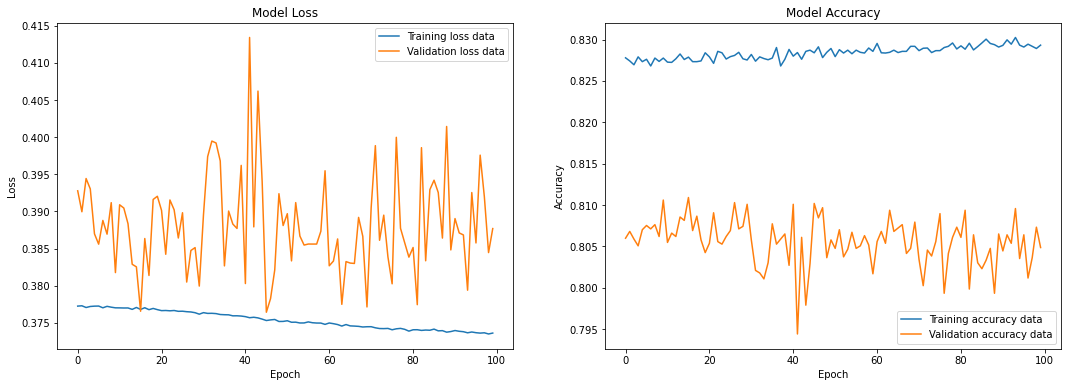

In [52]:
learning_curve(history1)

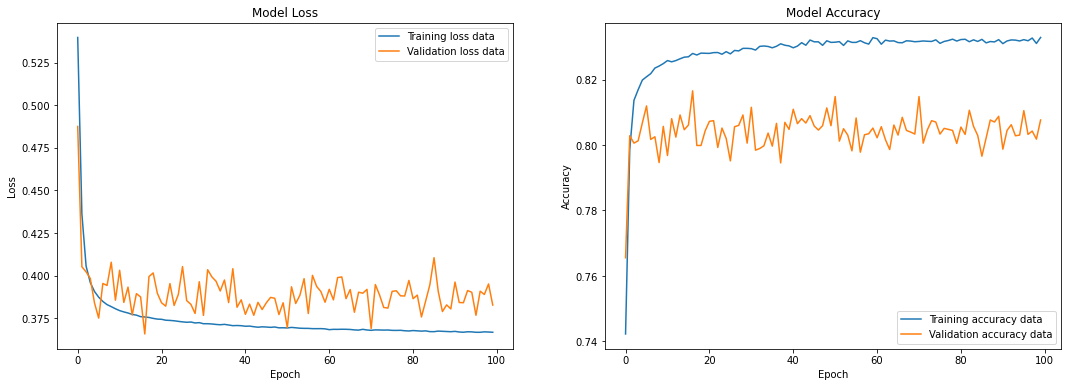

In [53]:
learning_curve(history2)

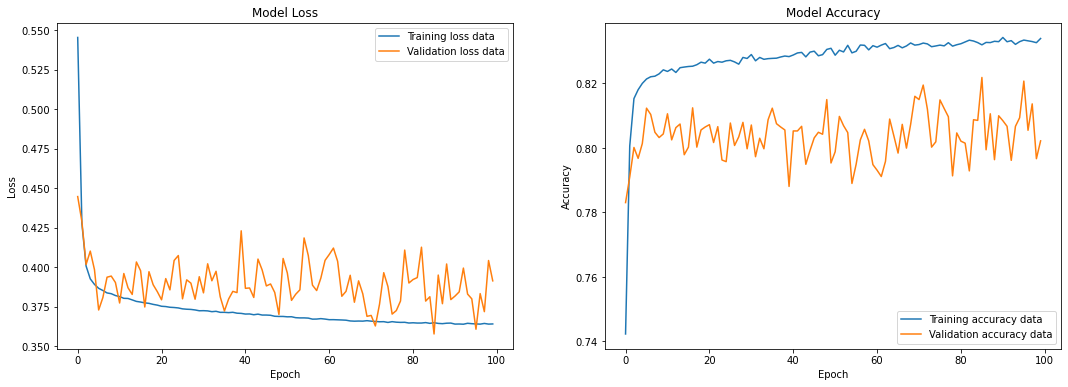

In [54]:
learning_curve(history3)

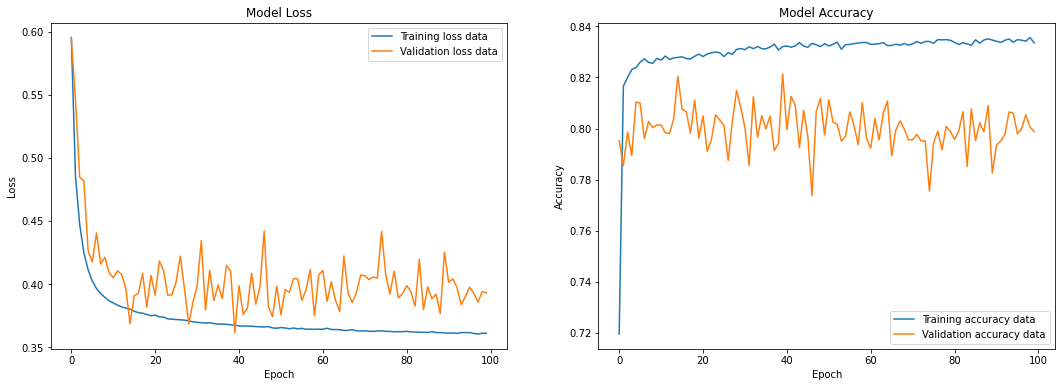

In [55]:
learning_curve(history4)

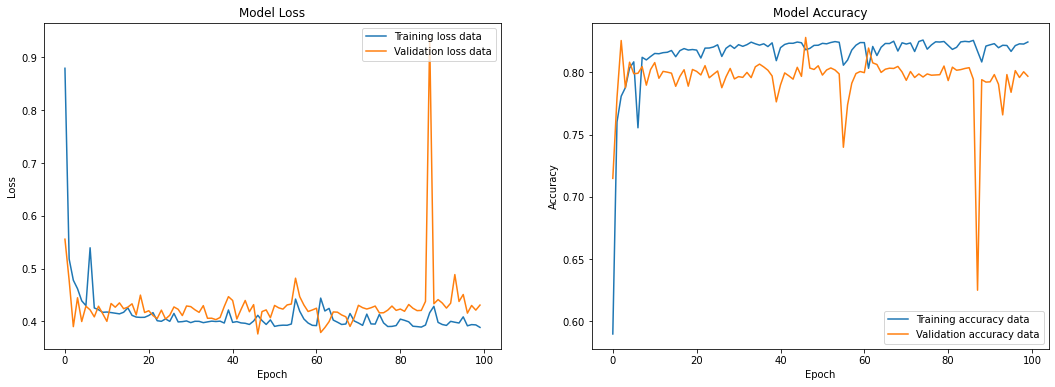

In [56]:
learning_curve(history5)

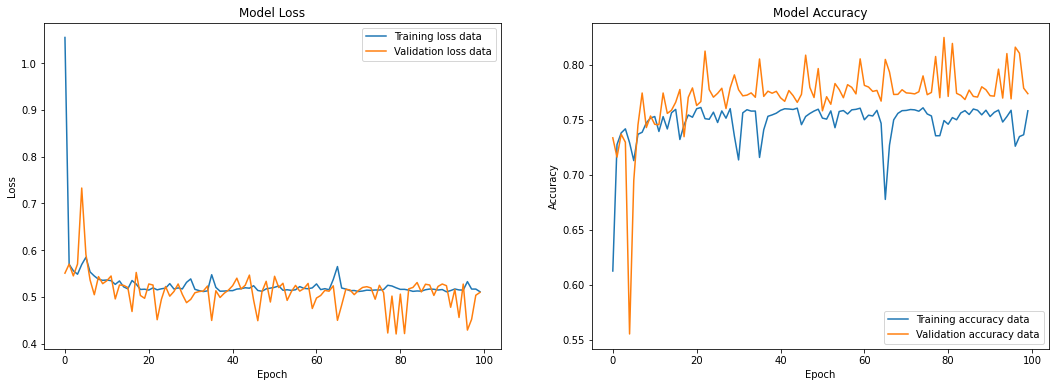

In [57]:
learning_curve(history6)

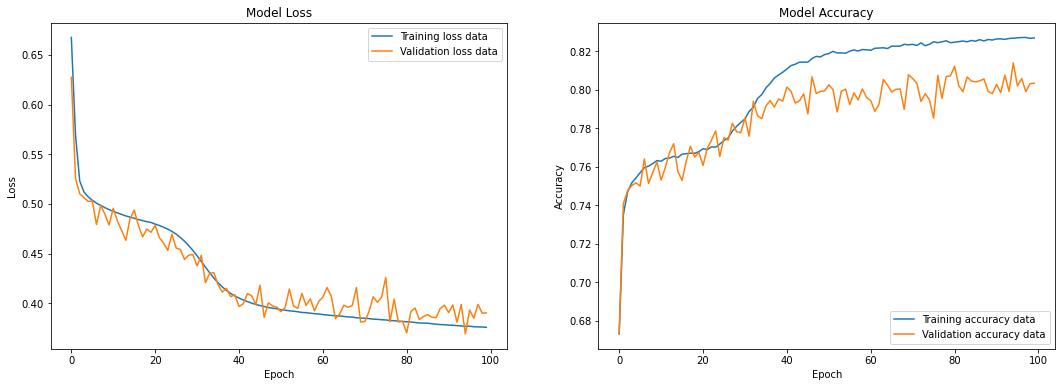

In [58]:
learning_curve(history7)

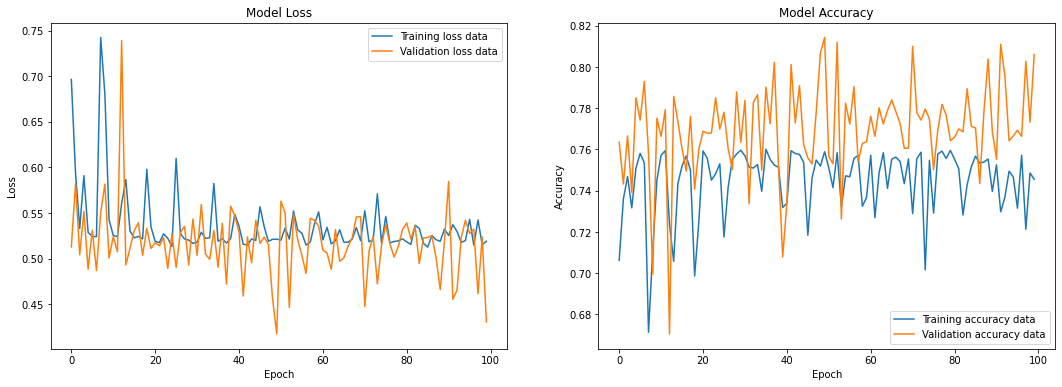

In [59]:
learning_curve(history8)

In [60]:
plot_model(model_base, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


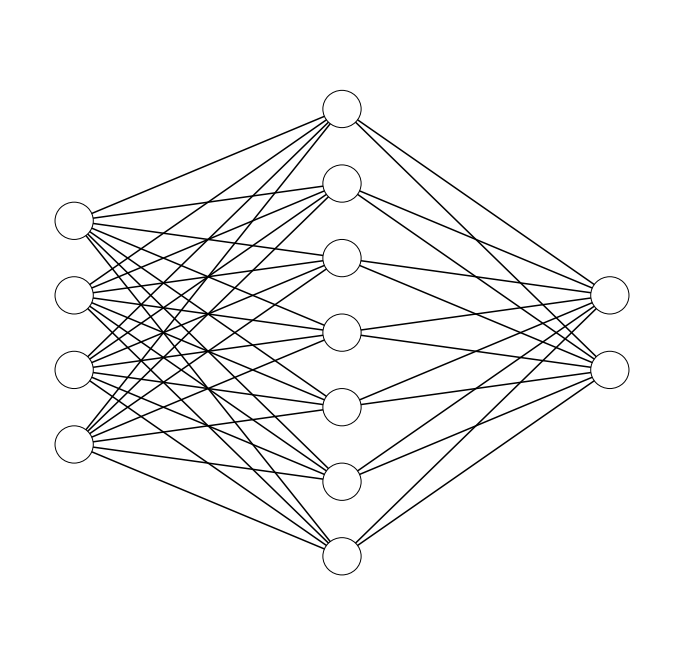

In [61]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 7, 2])


In [62]:
! jupyter nbconvert --to html Second_Phase.ipynb

[NbConvertApp] Converting notebook Second_Phase.ipynb to html
[NbConvertApp] Writing 1753673 bytes to Second_Phase.html
